In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Upload your Kaggle JSON file in the UI or save it directly as ~/.kaggle/kaggle.json
!mkdir ~/.kaggle
!echo '{"username":"your_username","key":"your_key"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download mostafaabla/garbage-classification


Dataset URL: https://www.kaggle.com/datasets/mostafaabla/garbage-classification
License(s): ODbL-1.0
 96% 230M/239M [00:01<00:00, 133MB/s]
100% 239M/239M [00:01<00:00, 133MB/s]


In [4]:
import zipfile
import os

# Extract dataset
zip_path = "/content/garbage-classification.zip"  # Path to your Kaggle downloaded file
output_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_path)

# Check extracted files
os.listdir(output_path)


['garbage_classification']

In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = os.path.join(output_path, '/content/dataset/garbage_classification')
val_dir = os.path.join(output_path, '/content/dataset/garbage_classification')

# Image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical')


Found 15515 images belonging to 12 classes.
Found 15515 images belonging to 12 classes.


In [7]:
from tensorflow.keras import layers, models

# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

# Save the model to Google Drive
model_save_path = "/content/drive/My Drive/garbage_classification_model.h5"
model.save(model_save_path)
print(f"Model saved to {model_save_path}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


485/485 ━━━━━━━━━━━━━━━━━━━━ 1189s 2s/step - accuracy: 0.4204 - loss: 1.8773 - val_accuracy: 0.5684 - val_loss: 1.3016
Epoch 2/20
485/485 ━━━━━━━━━━━━━━━━━━━━ 1164s 2s/step - accuracy: 0.5572 - loss: 1.3676 - val_accuracy: 0.6382 - val_loss: 1.0925
Epoch 3/20
485/485 ━━━━━━━━━━━━━━━━━━━━ 1232s 3s/step - accuracy: 0.5942 - loss: 1.2267 - val_accuracy: 0.6747 - val_loss: 0.9800
Epoch 4/20


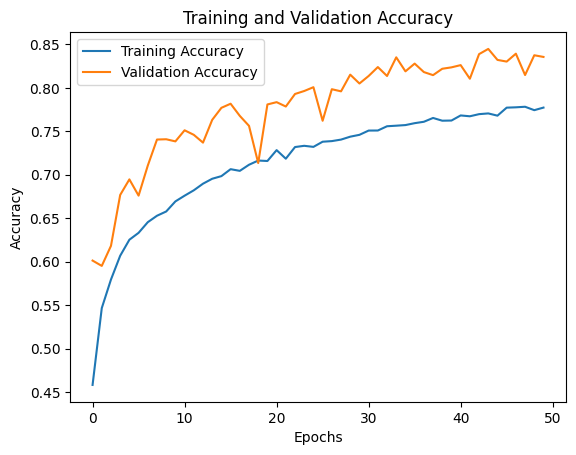

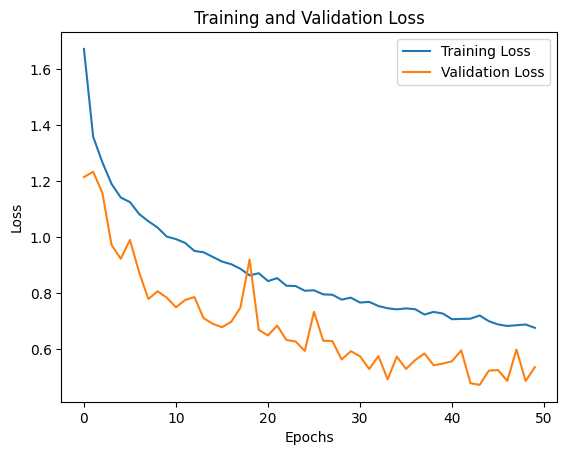

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

# Allow the user to upload an image
uploaded = files.upload()  # User uploads an image

# Get the file path of the uploaded image
for filename in uploaded.keys():
    test_image_path = filename

# Load the uploaded image for testing
img = image.load_img(test_image_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = {v: k for k, v in train_generator.class_indices.items()}

print(f"Predicted Class: {class_labels[predicted_class]}")


Saving clothes10.jpg to clothes10.jpg
1/1 [==============================] - 0s 32ms/step
Predicted Class: clothes
